# Multi-Armed Bandits

### Key Takeaways
1. What is a bandit problem, What is multi armed bandit and K-Armed bandit
2. Exploration vs Exploitation challenge
3. Action Value Methods
4. 10-Armed Testbed. Bandit Algorithm Implementation with Incremental update
5. Comparison of different values of Epsilons in terms of Average Reward

## 1. Bandit machines

<img src="images/slotMachine.png" alt="Bandit Machine" style="width: 200px;"/>

- Bandit machines used in casinos which have one lever
- The player needs to push the lever to win a jackpot or loose all their money
- The nature of the machine to get the players to empty their pockets is the reason it is called bandit machine.

## Multi-Armed or k-armed bandit machines

- Reinforcement learning uses a problem loosely derived from this bandit machine
- It provides a simplified setting, which does not involve learning to act in more than one situation (non-associative) setting.

- Instead of 1 arm there can be K arms
- the player can choose to pull any arm or take any action from the k options
- Each action has its own Reward probability distribution
- The goal of the agent is to maximize the total rewards across multiple episodes by learning to pull the right levers or take the most optimal actions

### K-Armed Bandit Problem

- The agent is repeatedly faced with k options or actions.
- Each action taken provides a numerical reward from a stationary probability distribution.
- Stationary means the mean and variance of the distribution does not change over time.
- Objective of the agent is to maximize the expected total reward over some time period, for ex over 1000 actions or time steps

### Value of the action

In the k-armed bandit problem, each of the k actions has an expected or mean reward given that action is selected, let’s call this the value of the action.

<img src="images/q_star.png" alt="Bandit Machine" style="width: 500px;"/>

- If we knew the value of each action I.e. q*(a) then it would be trivial to solve the k-armed bandit problem as we will always select the action with highest value.


- It is assumed that we do not know the action values q*(a) with certainty. Hence we need to estimate it. The estimated value is denoted as Qt(a) and our goal is to get Qt(a) to be as close to q*(a)


## 2. Exploration vs Exploitation

### Greedy actions

- We keep track of the estimated action values and the highest value at any time step is the greedy action.
- When the agent selects one of the greedy actions it is said to **exploit** its current knowledge



### Non-Greedy actions

- However if the action with non-highest value is selected then it is called the non-greedy action
- The agent is said to be **exploring**. It enables us to try out non greedy actions and may be improve their probability estimates

- Exploitation is the right thing to do maximize the reward on one step, but exploration is needed to maximize the total reward in the long run


-Reward is lower in the short run during exploration higher in longer run.

**Because it is not possible to both explore and exploit with any single action, it is referred to the conflict between exploration and exploitation**




Whether it is better to explore or exploit at any step is determined by the precise values of the estimates, uncertainties and the number of remaining steps


**We need to balance exploration and exploitation**

## 3. Action Value Methods

- Methods for estimating the values of actions and for using the estimates to make action selection decisions are collectively called Action-Value Methods.

- As I already mentioned that true value of an action is the mean reward when the action is selected. One natural way to estimate this is by averaging the rewards actually recieved

<img src="images/q_estimated.jpg" alt="q_estimated" style="width: 500px;"/>

- As the denominator goes to infinity, by law of large numbers Qt(a) converges to true value of q*(a). This method is called the **sample average method** for estimating action values

### Now comes the problem of how to select actions based on action values estimates


Simplest rules is to select one of the actions with highest estimated value, i.e. the greedy action. If there is more than one greedy action then the tie is broken by randomly selecting any of the greedy actions.

<img src="images/argmax.png" alt="argmax" style="width: 500px;"/>

### Epsilon Greedy methods

- Greedy action is good for maximize immediate rewards but for long run we need to introduce exploration.
- A simple way is the behave greedily most of the time but every once in a while with a small probability of epsilon, select a random action from among all the actions with equal probability, irrespective of the action value estimates.

- Such methods are called epsilon- greedy methods.


- The advantage of these methods is that, in the limit as the number of steps increases to every action will be sampled infinite number of times, which ensures that all the Qt(a) converge to q*(a)


**This implies that the probability of selecting the optimal action converges to greater than 1-epsilon, I.e. to near certainty.**


## 4. 10-Armed Testbed. Bandit Algorithm Implementation with Incremental update

<img src="images/10_armed_testbed.png" alt="10_armed_testbed" style="width: 600px;"/>

### Incremental Update Algorithm

<img src="images/incrementalAlgo.jpeg" alt="banditAlgo" style="width: 600px;"/>


<img src="images/banditAlgo.png" alt="10_armed_testbed" style="width: 600px;"/>

### Bandit Algorithm with Incremental Update

In [1]:
import numpy as np

In [10]:
q_star_a = np.random.normal(0,1,k)
print(q_star_a)

[ 0.0153654   2.70729617 -1.47579189 -0.13472592  0.03773133  0.25751557
  1.40308331 -0.1181109  -0.85816852  0.69066497]


In [127]:
k=10
q_star_a = np.random.normal(0,1,k)
print(q_star_a)

def max_index(q_a):
    #break ties randomly
    q_a = np.array(q_a)
    return np.random.choice(np.where(q_a == q_a.max())[0])

def bandit(a,q_star_a):
    #each reward for the action will come fromthe prob distribution of that action
    #which has a mean of q*(a) and variance of 1
    reward = np.random.normal(q_star_a[a],1) 
    return reward
    
def one_run(eps,k,steps):
    
    q_a = [0]*k
    n_a = [0]*k
    n_a_steps = []
    q_a_steps = []
    r_steps =[0]
    a_steps =[]
  
    for step in range(steps):
        if np.random.random() < eps:
            a = np.random.choice(range(k))
        else:
            a = max_index(q_a)
        #print(f'Action: {a}')
        r = bandit(a,q_star_a)
    
        
        a_steps.append(a)
        # cum_reward +=  r
        # print(cum_reward)
        n_a[a] += 1
        q_a[a] = q_a[a] + (1/n_a[a]) * (r - q_a[a])
       
        n_a_steps.append(n_a.copy())
        q_a_steps.append(q_a.copy())
        r_steps.append(r)
    
    return q_star_a, n_a_steps, q_a_steps, r_steps, a_steps


[ 1.37026341 -0.23388683 -0.25486226  1.62130114  0.06478948 -0.02462485
  0.71848552  1.0416152  -0.38215793  1.05697165]


In [88]:
q_star_a, n_a, q_a, r_a, a_steps = one_run(eps=0.1,k=10,steps=1000)

In [74]:
np.array(q_a).shape

(1000, 10)

In [51]:
max_index([0,0,1,1])

3

In [89]:
q_star_a

array([-0.52199539, -0.32469131, -0.26223425, -0.22981363,  0.60931314,
        0.20668003,  0.15599699,  0.16609501, -0.71650168, -0.23727358])

In [90]:
n_a[-10:]

[[20, 14, 11, 7, 771, 5, 27, 116, 7, 13],
 [20, 14, 11, 7, 772, 5, 27, 116, 7, 13],
 [20, 14, 11, 7, 773, 5, 27, 116, 7, 13],
 [20, 14, 11, 7, 774, 5, 27, 116, 7, 13],
 [20, 14, 11, 7, 775, 5, 27, 116, 7, 13],
 [20, 14, 11, 7, 776, 5, 27, 116, 7, 13],
 [20, 14, 11, 7, 777, 5, 27, 116, 7, 13],
 [20, 14, 11, 7, 778, 5, 27, 116, 7, 13],
 [20, 14, 11, 7, 779, 5, 27, 116, 7, 13],
 [20, 14, 11, 7, 780, 5, 27, 116, 7, 13]]

In [92]:
a_steps[-10:]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [95]:
q_a[-10:]

[[-0.6340782879400879,
  -0.5062987045232831,
  -0.36096788107779826,
  -0.7510675216622548,
  0.6012150357859309,
  -0.008543865588458988,
  0.07163186396640389,
  0.1294646716090863,
  -0.5697022803752921,
  -0.37975159262393365],
 [-0.6340782879400879,
  -0.5062987045232831,
  -0.36096788107779826,
  -0.7510675216622548,
  0.5990259967002202,
  -0.008543865588458988,
  0.07163186396640389,
  0.1294646716090863,
  -0.5697022803752921,
  -0.37975159262393365],
 [-0.6340782879400879,
  -0.5062987045232831,
  -0.36096788107779826,
  -0.7510675216622548,
  0.5973298706852808,
  -0.008543865588458988,
  0.07163186396640389,
  0.1294646716090863,
  -0.5697022803752921,
  -0.37975159262393365],
 [-0.6340782879400879,
  -0.5062987045232831,
  -0.36096788107779826,
  -0.7510675216622548,
  0.5981365412201682,
  -0.008543865588458988,
  0.07163186396640389,
  0.1294646716090863,
  -0.5697022803752921,
  -0.37975159262393365],
 [-0.6340782879400879,
  -0.5062987045232831,
  -0.36096788107779826

In [94]:
q_star_a

array([-0.52199539, -0.32469131, -0.26223425, -0.22981363,  0.60931314,
        0.20668003,  0.15599699,  0.16609501, -0.71650168, -0.23727358])

In [93]:
r_a[-10:]

[1.1434946960176133,
 -1.0887231383827536,
 -0.712079412847928,
 1.2216928646882024,
 1.7569571507068011,
 -0.7224822961934259,
 1.1418270956057612,
 2.5981730745636447,
 1.6631569013617868,
 0.7301252769023334]

In [161]:
n_runs = 2000

n_steps = 1000

eps = 0.1
n_a_runs = []
q_a_runs = []
r_a_runs = []
for run in range(n_runs):
    q_star_a,n_a,q_a,r_a,a_steps = one_run(eps,k=10,steps=n_steps)
        
    n_a_runs.append(n_a.copy())
    q_a_runs.append(q_a.copy())
    r_a_runs.append(r_a.copy())

In [110]:
print(np.array(n_a_runs[0][-1]))
print(np.array(q_a_runs[0][-1]))

[  7   8  12   9  11  12 564 150 219   8]
[ 0.67274383 -0.54342007 -0.01966921 -0.38046011 -1.25200523 -0.45376248
  1.91289935  0.49400277  1.38840865 -0.61561932]


In [177]:
q_a_runs[0][2]

[0,
 0,
 0,
 0,
 0,
 -1.0624359415457871,
 -1.4884405303872095,
 0,
 -0.42388883102581115,
 0]

In [111]:
np.array(n_a_runs).shape

(2000, 1000, 10)

In [112]:
q_values = np.array(q_a_runs)

In [113]:
q_values.shape

(2000, 1000, 10)

In [114]:
q_values[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.01247952, 0.        , 0.        ])

In [162]:
r_values= np.array(r_a_runs)

In [163]:
r_values.shape

(2000, 1001)

In [164]:
r_values.shape

(2000, 1001)

In [170]:
rewards = r_values.mean(axis=0)

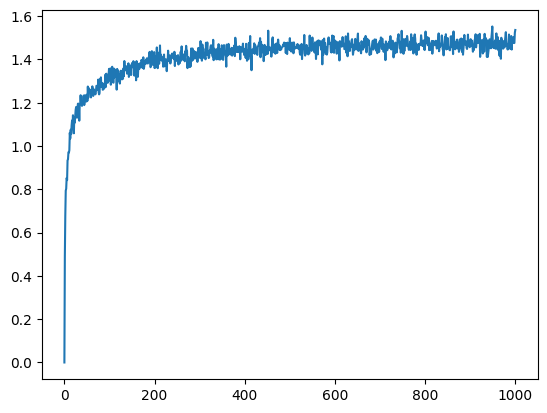

In [171]:
plt.plot(rewards,label=f'epsilon=0.01');

In [117]:
np.mean(r_values[:][0])

1.4295966566402276

In [125]:
r_values[0]

array([ 1.01247952e+00,  1.63773323e+00,  2.05229516e+00,  5.80284022e-01,
        2.63614687e-01,  1.61133474e+00,  3.68774303e-01, -1.00925799e+00,
       -6.12986510e-01,  7.93158649e-02, -5.31416960e-01,  7.60909735e-01,
        2.63765139e-01,  1.18969523e+00, -1.46881802e-01,  1.63129453e+00,
       -1.05254329e+00,  4.57826031e-01,  9.55999360e-01,  1.14119219e+00,
        8.21973387e-01, -8.20023832e-01, -5.21207503e-01,  4.74444207e-01,
       -1.08507597e+00,  1.23368207e+00,  3.27850422e-01,  2.44271628e+00,
        9.49268127e-01, -6.11079163e-02,  9.32001253e-01,  6.93077298e-01,
       -5.36531849e-01,  7.83762010e-01,  7.89702798e-01,  3.40425317e-01,
        8.10629891e-01,  5.21048992e-01,  4.72587892e-01,  8.87476291e-01,
       -1.31629949e-01,  1.62904940e+00,  1.11658189e+00, -3.61968699e-02,
       -3.60395778e-01, -1.90541775e-01, -1.08499631e-01, -1.93385393e-01,
        9.15032454e-01,  6.69690758e-01,  9.15903272e-01,  1.01260373e+00,
        3.57624150e-01, -

In [124]:
np.mean(r_values[:][0])

1.4295966566402276

In [102]:
np.mean(r_values[:][0])

1.8452209027225173

In [133]:
avg_rewards = [0]
for step in range(n_steps):
    mean = np.mean(r_values[:][step])
    avg_rewards.append(mean)

In [104]:
len(avg_rewards)

1000

In [105]:
sum(r_values[:][0])

1845.2209027225165

In [132]:
avg_rewards

[1.4375413352199025,
 1.541941975963755,
 1.4458871173670005,
 1.2751391693080618,
 1.4913065734081996,
 1.547828975381393,
 1.3913188059411525,
 1.516807613134138,
 1.3563944543187008,
 1.5036403314794269,
 1.5028175888292539,
 1.5182248137748204,
 1.2397702000944213,
 1.252598567339227,
 1.4615771178829249,
 1.51585549623812,
 1.1869889442265755,
 1.4313464604877255,
 1.4707559823509624,
 1.3436248909038373,
 1.2725116657604725,
 1.5277408822321012,
 1.405111126979417,
 1.5499651021044416,
 1.4524651869266751,
 1.5489054698708364,
 1.527770543875824,
 1.3247108378245822,
 1.496307902703797,
 1.291092032818766,
 1.4440793783133603,
 1.5021448915319684,
 1.494603777035453,
 1.3986675577814918,
 1.4605499553001238,
 1.51314165370509,
 1.3811653364295962,
 1.5084577997511581,
 1.2309672560672205,
 1.4728749651880317,
 1.462304481884944,
 1.3451096248006775,
 1.3008883338834483,
 1.46626136053193,
 1.5070788075146244,
 1.4282855839172022,
 1.486607905991166,
 1.5303384707842207,
 1.492394

In [9]:
import matplotlib.pyplot as plt

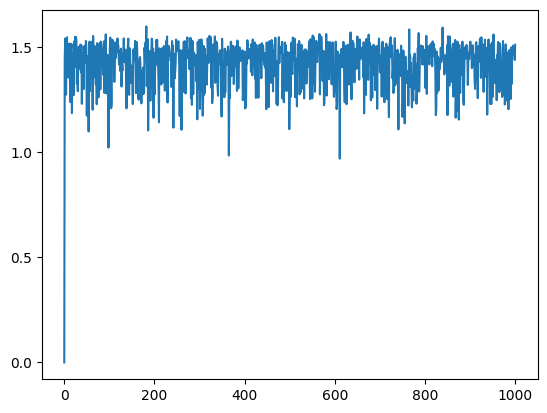

In [137]:
plt.yticks(np.arange(0, 2, 0.5))
plt.plot(avg_rewards)


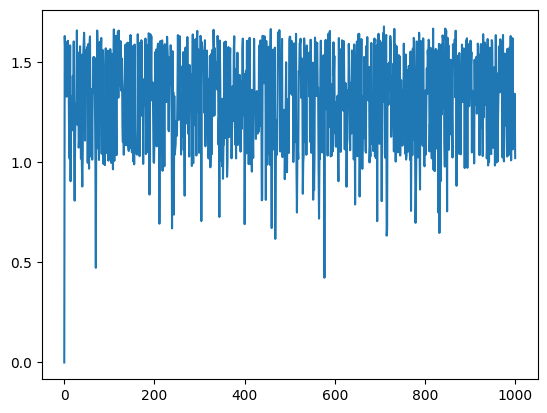

In [150]:
n_runs = 2000

n_steps = 1000

eps = 0.01
n_a_runs = []
q_a_runs = []
r_a_runs = []
for run in range(n_runs):
    q_star_a,n_a,q_a,r_a,a_steps = one_run(eps,k=10,steps=n_steps)
        
    n_a_runs.append(n_a.copy())
    q_a_runs.append(q_a.copy())
    r_a_runs.append(r_a.copy())

r_values= np.array(r_a_runs)
avg_rewards = [0]
for step in range(n_steps):
    mean = np.mean(r_values[:][step])
    avg_rewards.append(mean)

plt.yticks(np.arange(0, 2, 0.5))
plt.plot(avg_rewards)

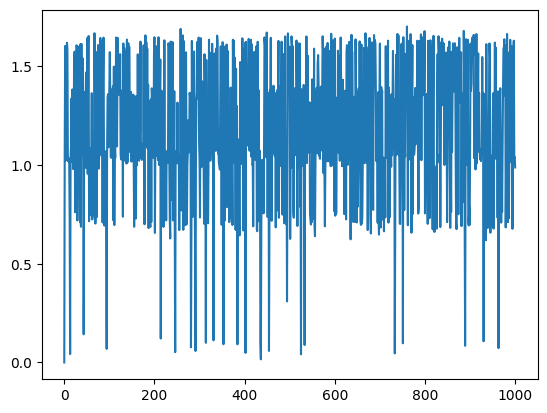

In [139]:
n_runs = 2000

n_steps = 1000

eps = 0
n_a_runs = []
q_a_runs = []
r_a_runs = []
for run in range(n_runs):
    q_star_a,n_a,q_a,r_a,a_steps = one_run(eps,k=10,steps=n_steps)
        
    n_a_runs.append(n_a.copy())
    q_a_runs.append(q_a.copy())
    r_a_runs.append(r_a.copy())

r_values= np.array(r_a_runs)
avg_rewards = [0]
for step in range(n_steps):
    mean = np.mean(r_values[:][step])
    avg_rewards.append(mean)

plt.yticks(np.arange(0, 2, 0.5))
plt.plot(avg_rewards)

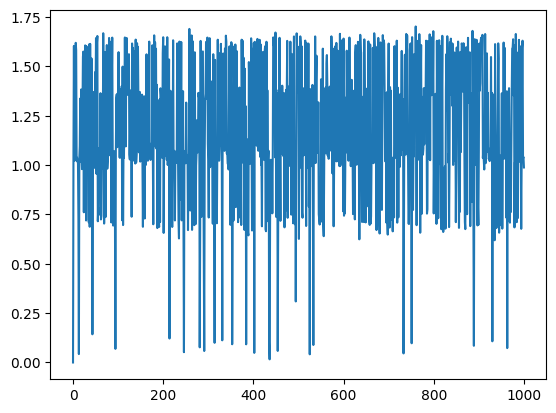

In [143]:
from scipy.interpolate import make_interp_spline, BSpline
#define spline
spl = make_interp_spline(range(1001), avg_rewards, k=3)
y_smooth = spl(range(1001))

#create smooth line chart 
plt.plot(range(1001), y_smooth)
plt.show()

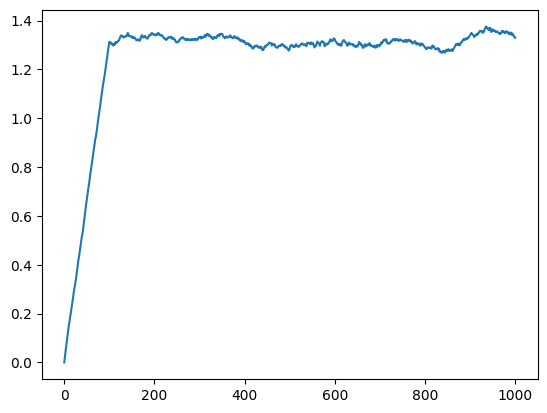

In [151]:
from scipy.signal import lfilter

n = 100             # larger n gives smoother curves
b = [1.0 / n] * n  # numerator coefficients
a = 1              # denominator coefficient
y_lf = lfilter(b, a, avg_rewards)
X=range(1001)
plt.plot(X, y_lf)
plt.show()

In [169]:
np.random.randn(10) + 0

array([ 0.17834558, -0.73293261, -0.22744061, -0.7516327 , -1.85777701,
        0.86119441,  0.80472546, -0.73897187, -0.23689314, -0.12348276])

# Final

In [ ]:
k=10
q_star_a = np.random.normal(0,1,k)
print(q_star_a)

def max_index(q_a):
    #break ties randomly
    q_a = np.array(q_a)
    return np.random.choice(np.where(q_a == q_a.max())[0])

def bandit(a,q_star_a):
    #each reward for the action will come fromthe prob distribution of that action
    #which has a mean of q*(a) and variance of 1
    reward = np.random.normal(q_star_a[a],1) 
    return reward
    
def one_run(eps,k,steps):
    
    q_a = [0]*k
    n_a = [0]*k
    n_a_steps = []
    q_a_steps = []
    r_steps =[0]
    a_steps =[]
  
    for step in range(steps):
        if np.random.random() < eps:
            a = np.random.choice(range(k))
        else:
            a = max_index(q_a)
        #print(f'Action: {a}')
        r = bandit(a,q_star_a)
    
        
        a_steps.append(a)

        n_a[a] += 1
        q_a[a] = q_a[a] + (1/n_a[a]) * (r - q_a[a])
       
        n_a_steps.append(n_a.copy())
        q_a_steps.append(q_a.copy())
        r_steps.append(r)
    
    return q_star_a, n_a_steps, q_a_steps, r_steps, a_steps




In [174]:
def run_bandit(n_runs=2000,n_steps=1000,eps=0.01):
    n_a_runs = []
    q_a_runs = []
    r_a_runs = []
    for run in range(n_runs):
        q_star_a,n_a,q_a,r_a,a_steps = one_run(eps,k=10,steps=n_steps)
            
        n_a_runs.append(n_a.copy())
        q_a_runs.append(q_a.copy())
        r_a_runs.append(r_a.copy())
    
    r_values= np.array(r_a_runs)
    avg_rewards = r_values.mean(axis=0)
    return avg_rewards

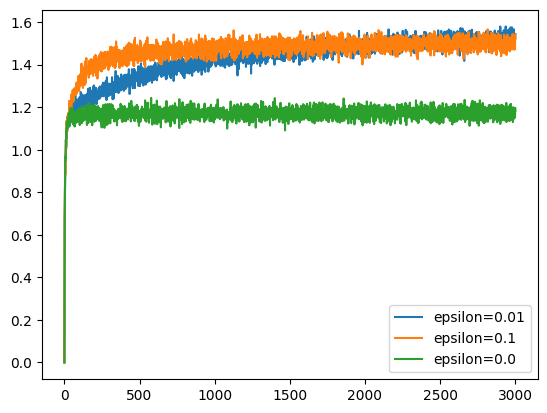

In [178]:
n_steps=3000
rewards = run_bandit(n_steps=n_steps,eps=0.01)
plt.plot(rewards,label=f'epsilon=0.01');
plt.legend()

rewards = run_bandit(n_steps=n_steps,eps=0.1)
plt.plot(rewards,label=f'epsilon=0.1');
plt.legend()

rewards = run_bandit(n_steps=n_steps,eps=0.0)
plt.plot(rewards,label=f'epsilon=0.0');
plt.legend()